# Сделать такую же подготовку для тестового датасета!!!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
test_data = pd.read_csv('ttest_prepared_02.csv')
train_data = pd.read_csv('train_prepared_01.csv')

In [3]:
# test_data.info()

In [4]:
# train_data.info()

In [5]:
# plt.scatter(train_data.Rooms, train_data.Square)

In [6]:
# plt.scatter(train_data.Rooms, train_data.Price)

In [7]:
# plt.scatter(train_data.Square, train_data.LifeSquare)

In [8]:
# Убираем все экстримальные значения

# Функции для очистки и подготовки данных
mean_year = np.round(train_data.loc[train_data['HouseYear'] <= 2020, 'HouseYear'].mean())
mean_healthcare = np.round(train_data["Healthcare_1"].mean())
mean_square_for_max = train_data.loc[(train_data['Rooms'] <= train_data.loc[(train_data['Square'] > 300), 'Rooms'].mean()), 'Square'].mean()
mean_square_for_big_ls = train_data.loc[train_data['LifeSquare'] > 250, 'Square'].mean()
mean_life_squae_for_max = train_data.loc[train_data['Square'] >= mean_square_for_big_ls, 'LifeSquare'].mean()

In [9]:
print(mean_year)
print(mean_healthcare)
print(mean_square_for_max)
print(mean_square_for_big_ls)
print(mean_life_squae_for_max)

1985.0
1026.0
41.4101012544039
nan
nan


In [10]:
def clean_year(df, mean_year):
    df.loc[df['HouseYear'] > 2020, 'HouseYear'] = mean_year

In [11]:
def clean_life_square(df, mean_life_squae_for_max):
    df.loc[(df['LifeSquare'] < 5) | (df['LifeSquare'].isnull()), 'LifeSquare'] = df['Square']*0.85
    df.loc[df['LifeSquare'] > 250, 'LifeSquare'] = mean_life_squae_for_max

In [12]:
def clean_square(df, mean_square_for_max):
    df.loc[(df['Square'] > 300), 'Square'] = mean_square_for_max

In [13]:
def clean_healthcare_1(df, mean_healthcare):
    df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = mean_healthcare

In [14]:
def clean_rooms(df):
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] < 30), 'Rooms'] = 1
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 30) & (df['LifeSquare'] < 45), 'Rooms'] = 2
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 45) & (df['LifeSquare'] < 60), 'Rooms'] = 3
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 60) & (df['LifeSquare'] < 75), 'Rooms'] = 4
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 70), 'Rooms'] = 6
    df.loc[(df['Rooms'] > 10), 'Rooms'] = 2

In [15]:
def prepare_data(df, mean_year=mean_year, mean_healthcare=mean_healthcare, mean_square_for_max=mean_square_for_max, mean_life_squae_for_max=mean_life_squae_for_max):
    clean_year(df, mean_year)
    clean_life_square(df, mean_life_squae_for_max)
    clean_healthcare_1(df, mean_healthcare)
    clean_rooms(df)
    clean_square(df, mean_square_for_max)

In [16]:
# prepare_data(train_data)
# prepare_data(test_data)

In [17]:
X = pd.get_dummies(train_data)
# X = pd.DataFrame(train_data, columns=fiature_names)
X.drop("Price", axis=1, inplace=True)
X.drop("Id", axis=1, inplace=True)
X.drop("Unnamed: 0", axis=1, inplace=True)

In [18]:
# train_data.info()

# Личная обработка данных (без примера)!

    Id - идентификационный номер квартиры
    DistrictId - идентификационный номер района
    Rooms - количество комнат
    Square - площадь
    LifeSquare - жилая площадь
    KitchenSquare - площадь кухни
    Floor - этаж
    HouseFloor - количество этажей в доме
    HouseYear - год постройки дома
    Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
    Social_1, Social_2, Social_3 - социальные показатели местности
    Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
    Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
    Price - цена квартиры 

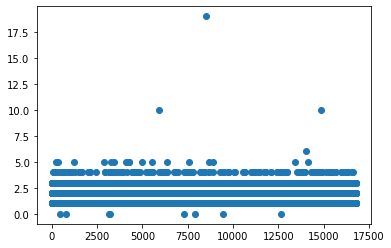

In [19]:
# обработать количество комнат
plt.scatter(train_data.Id, train_data.Rooms)

In [20]:
# # смотреть цены на квартиры больше 5 комнат
# over_rooms = train_data.loc[train_data['Rooms'] > 5, 'Rooms',] 
# over_rooms

In [21]:
# over_rooms_price = train_data.loc[arr_over_rooms, 'Rooms']
# over_rooms_price

In [22]:
# plt.scatter(over_rooms, over_rooms_price)

In [23]:
# Если комнат больше 

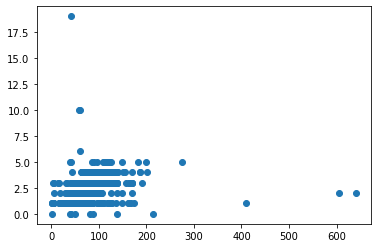

In [24]:
# кол-во комнат в зависимости от площади
plt.scatter(train_data.Square, train_data.Rooms)

In [25]:
# соотношение комнат к площади
koef_rooms=train_data.Square.sum()/train_data.Rooms.sum()
koef_rooms

29.78882581218491

In [26]:
# убрать выбросы по комнатам по коэф
train_data.loc[(train_data['Rooms'] > 5) & 
               (train_data['Square'] < 250), 'Rooms'] = (train_data.Square/koef_rooms).round()
train_data.loc[(train_data['Rooms'] < 1) & 
               (train_data['Square'] < 250), 'Rooms'] = (train_data.Square/koef_rooms).round()

In [27]:
# убрать выбросы по площади по коэф
train_data.loc[(train_data['Square'] > 250) | 
               (train_data['Square'] < 20), 'Square'] = (koef_rooms*train_data.Rooms).round(2)

In [28]:
# соотношение комнат к площади
koef_price_sqr=train_data.Price.sum()/train_data.Square.sum()
koef_price_sqr

3808.820744603926

In [29]:
train_data.loc[train_data['Id'] == 4853, 'Square']

Series([], Name: Square, dtype: float64)

In [30]:
# убрать нулевое значение комнат и площади
train_data.loc[train_data['Square'] < 20, 'Square'] = (train_data.Price/koef_price_sqr).round(3)

In [31]:
train_data.loc[(train_data['Rooms'] < 1) & 
               (train_data['Square'] < 250), 'Rooms'] = (train_data.Square/koef_rooms).round()

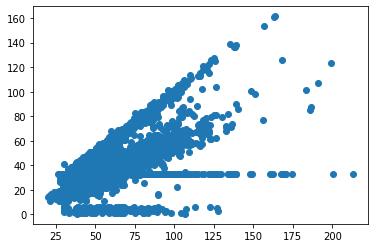

In [32]:
# кол-во комнат в зависимости от площади
plt.scatter(train_data.Square, train_data.LifeSquare)

In [33]:
tr=train_data.LifeSquare.value_counts()
# tr=train_data['LifeSquare'].value_counts()
print(tr)
tr.value_counts()
# for 


32.781260    2126
35.812832       1
29.429017       1
23.535141       1
35.086787       1
             ... 
29.869737       1
22.640150       1
20.087045       1
30.912387       1
33.743934       1
Name: LifeSquare, Length: 7875, dtype: int64


1       7874
2126       1
Name: LifeSquare, dtype: int64

In [34]:
tr.index[0]

32.78126019215573

In [35]:
train_data.LifeSquare.sum()

352478.3373126908

In [36]:
# не равно выбросу tr.index[0] - 32.78126019215573
LifeSquare_SUM=train_data.loc[(train_data.LifeSquare != tr.index[0]) & 
               (train_data['LifeSquare'] > 10) &
               (train_data['LifeSquare'] < 200),'LifeSquare'].sum()
LifeSquare_SUM

282070.61892322876

In [37]:
# соотношение жил площади к площади
koef_S_LS=train_data.Square.sum()/LifeSquare_SUM
koef_S_LS

1.9933004747226366

In [38]:
# вычистить выбросы жил площади
train_data.loc[(train_data.LifeSquare == tr.index[0]) | 
               (train_data['LifeSquare'] < 10) | 
               (train_data['LifeSquare'] > 200),'LifeSquare'] = train_data.Square/koef_S_LS

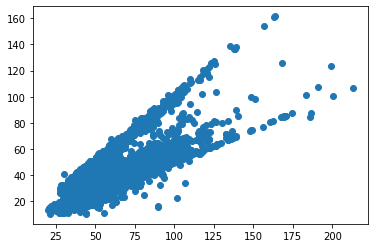

In [39]:
# кол-во комнат в зависимости от площади
plt.scatter(train_data.Square, train_data.LifeSquare)

# Удалить редкие случаи справа вообще и сравнить как будет без них!!!
Удалить квартиру с 7-ю комнатами!!!




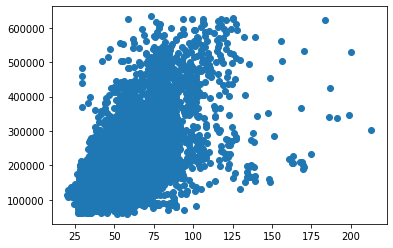

In [40]:
# кол-во комнат в зависимости от площади
plt.scatter(train_data.Square, train_data.Price)

In [41]:
train_data

,Unnamed: 0,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,...,Healthcare_1,Helthcare_2,Shops_1,Price,A,B,A.1,B.1,A.2,B.2
0,0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,...,900.0,0,11,184966.930730,0,1,0,1,0,1
1,1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,...,240.0,1,16,300009.450063,0,1,0,1,0,1
2,2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,...,229.0,1,3,220925.908524,0,1,0,1,0,1
3,3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,...,1084.0,0,5,175616.227217,0,1,0,1,0,1
4,4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,...,2078.0,2,4,150226.531644,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,...,350.0,3,11,196684.316040,0,1,0,1,0,1
9996,9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,...,900.0,0,5,189050.289571,0,1,0,1,1,0
9997,9997,5123,27,1.0,47.939008,24.050066,1.0,12,16.0,2015,...,900.0,0,0,159143.805370,0,1,0,1,1,0
9998,9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,...,325.0,2,5,181595.339808,0,1,1,0,0,1


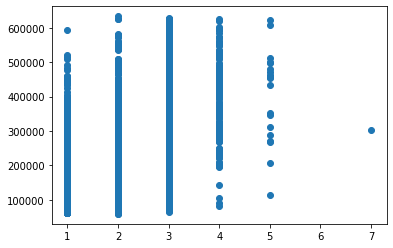

In [42]:
plt.scatter(train_data.Rooms, train_data.Price)

In [43]:
X

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,A,B,A.1,B.1,A.2,B.2
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,...,5,900.0,0,11,0,1,0,1,0,1
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,...,1,240.0,1,16,0,1,0,1,0,1
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,...,0,229.0,1,3,0,1,0,1,0,1
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,...,3,1084.0,0,5,0,1,0,1,0,1
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,...,1,2078.0,2,4,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,46,...,6,350.0,3,11,0,1,0,1,0,1
9996,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,30,...,0,900.0,0,5,0,1,0,1,1,0
9997,27,1.0,47.939008,32.781260,1.0,12,16.0,2015,0.072158,2,...,1,900.0,0,0,0,1,0,1,1,0
9998,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,30,...,9,325.0,2,5,0,1,1,0,0,1


# дообработка данных!!!
# Тут посмотреть на это соотношение!!!

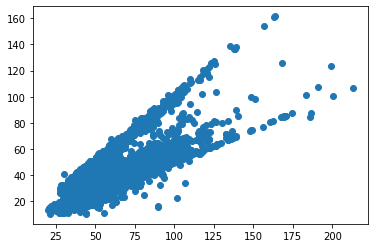

In [44]:
plt.scatter(train_data.Square, train_data.LifeSquare)

In [45]:
X = pd.get_dummies(train_data)
X.drop("Price", axis=1, inplace=True)
X.drop("Id", axis=1, inplace=True)
X.drop("Unnamed: 0", axis=1, inplace=True)

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
A                10000 non-null int64
B                10000 non-null int64
A.1              10000 non-null int64
B.1              10000 non-null int64
A.2              10000 non-null int64
B.2              10000 non-null int64
dtypes: float64(7), int64(14)
memory usage: 1.6 MB


In [47]:
X.T

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
DistrictId,35.000000,41.000000,53.000000,58.000000,99.000000,59.000000,154.000000,74.000000,1.000000,23.000000,...,1.000000,3.000000,150.000000,13.000000,23.000000,32.000000,18.000000,27.000000,75.000000,128.000000
Rooms,2.000000,3.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000
Square,47.981561,65.683640,44.947953,53.352981,39.649192,80.384479,62.254114,80.312926,64.511437,46.461409,...,57.373889,101.622794,78.249637,80.631333,64.864198,50.401785,41.521546,47.939008,43.602562,38.666645
LifeSquare,29.442751,40.049543,29.197612,52.731512,23.776169,46.683720,37.160377,40.291430,32.364131,18.915552,...,39.688445,51.628780,49.385096,48.899083,32.541104,30.476203,20.539216,24.050066,33.840147,21.157874
KitchenSquare,6.000000,8.000000,0.000000,9.000000,7.000000,12.000000,7.000000,0.000000,1.000000,8.000000,...,5.000000,12.000000,10.000000,10.000000,1.000000,5.000000,9.000000,1.000000,8.000000,8.000000
Floor,7.000000,7.000000,8.000000,8.000000,11.000000,5.000000,3.000000,14.000000,9.000000,13.000000,...,2.000000,18.000000,5.000000,11.000000,17.000000,6.000000,13.000000,12.000000,1.000000,7.000000
HouseFloor,9.000000,9.000000,12.000000,17.000000,12.000000,17.000000,5.000000,0.000000,17.000000,17.000000,...,5.000000,17.000000,16.000000,14.000000,17.000000,5.000000,13.000000,16.000000,5.000000,17.000000
HouseYear,1969.000000,1978.000000,1968.000000,1977.000000,1976.000000,2011.000000,1960.000000,1977.000000,1977.000000,2014.000000,...,1962.000000,2000.000000,1976.000000,1999.000000,1977.000000,1968.000000,2000.000000,2015.000000,1961.000000,1990.000000
Ecology_1,0.089040,0.000070,0.049637,0.437885,0.012339,0.309479,0.460556,0.075779,0.007122,0.075779,...,0.036270,0.265089,0.300323,0.090799,0.075779,0.135650,0.000000,0.072158,0.307467,0.000000
Social_1,33.000000,46.000000,34.000000,23.000000,35.000000,35.000000,20.000000,6.000000,1.000000,6.000000,...,6.000000,37.000000,52.000000,74.000000,6.000000,46.000000,30.000000,2.000000,30.000000,27.000000


In [48]:
y = train_data.Price
y.count()

10000

In [49]:
def my_reset(*varnames):
    """
    varnames are what you want to keep
    """
    globals_ = globals()
    to_save = {v: globals_[v] for v in varnames}
    to_save['my_reset'] = my_reset  # lets keep this function by default
    del globals_
    get_ipython().magic("reset")
    globals().update(to_save)

In [50]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.27, random_state=42)

In [60]:
model = RandomForestRegressor(n_estimators=1000, max_depth=18, random_state=42, max_features=6, n_jobs=4)
# ,criterion='mae'

In [61]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=4,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [62]:
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)

In [63]:
# Предсказываем на valid и train данных и проверяем метрики
# Для train
r2_score(y_train, y_pred_train)

0.9561122184595691

In [64]:
# Для valid
r2_score(y_valid, y_pred)

0.7322039453194051

In [348]:
my_reset('X','y','y_valid','y_pred','y_train','y_pred_train','X_valid','X_train','model','train_data','test_data')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


0.9569322644630279
0.7363696727011546
0.7307089487641307
0.7307868395032514 - max_features=9
0.9573775470627431 - max_features=10
0.7289311676718944 - max_features=10
0.7333115719297525 - test_size=0.27
0.7341141938455393 - max_features=6
0.7347911846172367 - criterion='mae' - подключить В КОНЦЕ!!!
n_estimators=1000, max_depth=18 - эти не регулировал еще

0.7337379469837854 - после обработки с test_size=0.27 и max_features=6
0.7327334806788719 - после подготовки данных Life_Square

class sklearn.ensemble.RandomForestRegressor(
    n_estimators — число деревьев в "лесу" (по дефолту – 10)
    criterion — функция, которая измеряет качество разбиения ветки дерева (по дефолту — "mse" , так же можно выбрать "mae")
    max_features — число признаков, по которым ищется разбиение. Вы можете указать конкретное число или процент признаков, либо выбрать из доступных значений: "auto" (все признаки), "sqrt", "log2". По дефолту стоит "auto".
    max_depth — максимальная глубина дерева  (по дефолту глубина не ограничена)
    min_samples_split — минимальное количество объектов, необходимое для разделения внутреннего узла. Можно задать числом или процентом от общего числа объектов (по дефолту — 2)
    min_samples_leaf — минимальное число объектов в листе. Можно задать числом или процентом от общего числа объектов (по дефолту — 1)
    min_weight_fraction_leaf — минимальная взвешенная доля от общей суммы весов (всех входных объектов) должна быть в листе (по дефолту имеют одинаковый вес)
    max_leaf_nodes — максимальное количество листьев (по дефолту нет ограничения)
    min_impurity_split — порог для остановки наращивания дерева (по дефолту 1е-7)
    bootstrap — применять ли бустрэп для построения дерева (по дефолту True)
    oob_score — использовать ли out-of-bag объекты для оценки R^2 (по дефолту False)
    n_jobs — количество ядер для построения модели и предсказаний (по дефолту 1, если поставить -1, то будут использоваться все ядра)
    random_state — начальное значение для генерации случайных чисел (по дефолту его нет, если хотите воспроизводимые результаты, то нужно указать любое число типа int
    verbose — вывод логов по построению деревьев (по дефолту 0)
    warm_start — использует уже натренированую модель и добавляет деревьев в ансамбль (по дефолту False)
)

# вес признаков

<function matplotlib.pyplot.show(*args, **kw)>

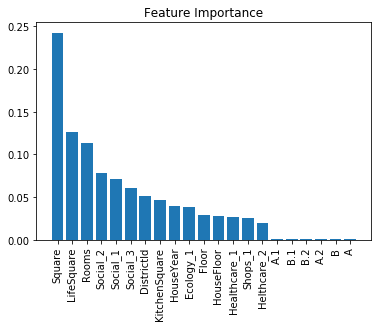

In [56]:
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]
# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# plt.barh(x_train.columns, model.feature_importances_)

plt.show

In [49]:
model.feature_importances_

array([0.05204091, 0.12233604, 0.25720901, 0.10239052, 0.04450849,
       0.02964587, 0.02851646, 0.04003455, 0.03859693, 0.07174579,
       0.07599075, 0.06024606, 0.02666157, 0.01968427, 0.02614679,
       0.00040507, 0.00041234, 0.00090303, 0.00090317, 0.00079855,
       0.00082381])

In [57]:
X_test = pd.get_dummies(test_data)
X_test.drop("Id", axis=1, inplace=True)

In [58]:
# Предсказываем цены для тестовых данных и выгружаем в файл
X_test = pd.get_dummies(test_data)
X_test.drop("Id", axis=1, inplace=True)
X_test.drop("Unnamed: 0", axis=1, inplace=True)
test_data["Price"] = model.predict(X_test)

In [59]:
# экспорт в файл
test_data.loc[:, ['Id', 'Price']].to_csv('kaggle_exam_my_data_03.csv', index=False)